<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Project-Description" data-toc-modified-id="Project-Description-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Project Description</a></span></li><li><span><a href="#Dataset-Description" data-toc-modified-id="Dataset-Description-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Dataset Description</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Objectives</a></span></li></ul></li><li><span><a href="#Initial-Data-Processing" data-toc-modified-id="Initial-Data-Processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initial Data Processing</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-The-Dataset" data-toc-modified-id="Loading-The-Dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading The Dataset</a></span></li><li><span><a href="#Initial-Data-Exploration" data-toc-modified-id="Initial-Data-Exploration-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Initial Data Exploration</a></span></li></ul></li><li><span><a href="#Data-Cleaning-and-Preprocessing" data-toc-modified-id="Data-Cleaning-and-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning and Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Handling-Missing-Values" data-toc-modified-id="Handling-Missing-Values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Handling Missing Values</a></span></li><li><span><a href="#Irrelevant-Column-Removal" data-toc-modified-id="Irrelevant-Column-Removal-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Irrelevant Column Removal</a></span></li><li><span><a href="#Data-Type-Conversion" data-toc-modified-id="Data-Type-Conversion-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Type Conversion</a></span></li></ul></li><li><span><a href="#Feature-Extraction" data-toc-modified-id="Feature-Extraction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Extraction</a></span><ul class="toc-item"><li><span><a href="#Extracting-Hard-Skills-and-Soft-Skills" data-toc-modified-id="Extracting-Hard-Skills-and-Soft-Skills-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Extracting Hard Skills and Soft Skills</a></span></li><li><span><a href="#Extracting-Education-Requirements" data-toc-modified-id="Extracting-Education-Requirements-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extracting Education Requirements</a></span></li><li><span><a href="#Extracting-Experience-Requirements" data-toc-modified-id="Extracting-Experience-Requirements-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extracting Experience Requirements</a></span></li><li><span><a href="#Categorizing-'via'-column" data-toc-modified-id="Categorizing-'via'-column-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Categorizing 'via' column</a></span></li><li><span><a href="#Handling-'schedule_type'-Column" data-toc-modified-id="Handling-'schedule_type'-Column-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Handling 'schedule_type' Column</a></span></li></ul></li><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>One-Hot Encoding</a></span><ul class="toc-item"><li><span><a href="#Encoding-Hard-Skills-and-Soft-Skills" data-toc-modified-id="Encoding-Hard-Skills-and-Soft-Skills-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Encoding Hard Skills and Soft Skills</a></span><ul class="toc-item"><li><span><a href="#Hard-Skills" data-toc-modified-id="Hard-Skills-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Hard Skills</a></span></li><li><span><a href="#Soft-Skills" data-toc-modified-id="Soft-Skills-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Soft Skills</a></span></li></ul></li><li><span><a href="#Encoding-Education-and-Experience-Requirements" data-toc-modified-id="Encoding-Education-and-Experience-Requirements-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Encoding Education and Experience Requirements</a></span></li></ul></li></ul></div>

# Introduction

This notebook will involve cleaning datasets.

## Project Description

This notebooks goal is to transform multiple diverse datasets into a single, unified schema that will facilitate further analysis. The desired schema is as follows:

- `Job Title`
- `Company Name`
- `Industry`
- `Location`
- `Via` (the platform through which the job was posted)
- `Salary Lower Bound`
- `Salary Upper Bound`
- `Description` (the job description, from which we can extract required skills)

Following this preprocessing and cleaning phase, the next step (carried out in a separate notebook) will be to analyze the cleaned data, exploring relationships and trends and, hopefully, gaining new insights into the data job market.

## Dataset Description

This dataset pulls job postings from Google's search results for Data Analyst positions in the United States.

This dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search).

Data collection started on November 4th, 2022, and adds ~100 new job postings to this dataset daily.

Dataset downloaded on July 11th, 2023.

## Objectives

# Initial Data Processing

## Importing Libraries

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Loading The Dataset

In [2]:
df = pd.read_csv('../data/gsearch_jobs.csv')

## Initial Data Exploration

In [18]:
df.shape

(22853, 27)

In [19]:
df.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst - HR Analytics (H),Avispa,United States,via LinkedIn,Data Analyst - HR Analytics R-2023-05-112 (H)\...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBIUiBBbm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'tableau', 'sql', 'python']"
1,1,1,Data Analyst/Scientist,World Wide Technology,Anywhere,via LinkedIn,Company Overview:\n\nWorld Wide Technology (WW...,"['8 hours ago', 'Work from home', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QvU2NpZW50aX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'ssis', 'aws']"
2,2,2,Data Analyst II,Corporate,"Jefferson City, MO",via JobServe,You could be the one who changes everything fo...,"['6 hours ago', 'Full-time', 'Health insurance...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgSUkiLCJodG...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'sql', 'ssis', 'ssrs']"
3,3,3,Data analyst,Upwork,Anywhere,via Upwork,Want a good data analyst who can handle large ...,"['15 hours ago', '15–45 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,15–45,an hour,30.0,15.0,45.0,30.0,NaN,62400.0,[]
4,4,4,Data Analyst – Global Learning Management,Kelly Services,"Wichita, KS",via MyKelly,"At Kelly® Professional & Industrial, we’re pas...",['12 hours ago'],eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3Qg4oCTIEdsb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['tableau']


In [20]:
df.describe()

,Unnamed: 0,index,commute_time,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized
count,22853.000000,22853.000000,0.0,4332.000000,4064.000000,4064.000000,2612.000000,1713.000000,4332.000000
mean,11426.000000,1137.280882,NaN,40000.934539,33780.174405,47855.897852,44.509788,101065.236929,95905.148213
std,6597.237187,742.799016,NaN,52546.256475,44122.891275,62439.754512,23.049654,28521.952993,41539.234564
min,0.000000,0.000000,NaN,9.000000,8.000000,10.000000,9.000000,29289.840000,18720.000000
25%,5713.000000,519.000000,NaN,33.000000,20.000000,45.000000,29.375000,85000.000000,65000.000000
50%,11426.000000,1079.000000,NaN,62.500000,50.000000,75.000000,40.000000,96500.000000,96500.000000
75%,17139.000000,1650.000000,NaN,96500.000000,77000.000000,115000.000000,57.500000,110500.000000,119600.000000
max,22852.000000,3476.000000,NaN,233500.000000,215000.000000,283000.000000,300.000000,233500.000000,624000.000000


In [21]:
df.dtypes

Unnamed: 0               int64
index                    int64
title                   object
company_name            object
location                object
via                     object
description             object
extensions              object
job_id                  object
thumbnail               object
posted_at               object
schedule_type           object
work_from_home          object
salary                  object
search_term             object
date_time               object
search_location         object
commute_time           float64
salary_pay              object
salary_rate             object
salary_avg             float64
salary_min             float64
salary_max             float64
salary_hourly          float64
salary_yearly          float64
salary_standardized    float64
description_tokens      object
dtype: object

# Data Cleaning and Preprocessing

## Handling Missing Values

In [22]:
df.isnull().sum()

Unnamed: 0                 0
index                      0
title                      0
company_name               0
location                  19
via                        0
description                0
extensions                 0
job_id                     0
thumbnail              11057
posted_at                  0
schedule_type            157
work_from_home         12610
salary                 18521
search_term                0
date_time                  0
search_location            0
commute_time           22853
salary_pay             18521
salary_rate            18521
salary_avg             18521
salary_min             18789
salary_max             18789
salary_hourly          20241
salary_yearly          21140
salary_standardized    18521
description_tokens         0
dtype: int64

In [23]:
df.duplicated().sum()

0

## Irrelevant Column Removal

In [24]:
df = df.drop(['job_id', 'thumbnail', 'commute_time'], axis=1)

In [25]:
df

,Unnamed: 0,index,title,company_name,location,via,description,extensions,posted_at,schedule_type,...,search_location,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst - HR Analytics (H),Avispa,United States,via LinkedIn,Data Analyst - HR Analytics R-2023-05-112 (H)\...,"['21 hours ago', 'Full-time', 'Health insuranc...",21 hours ago,Full-time,...,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'tableau', 'sql', 'python']"
1,1,1,Data Analyst/Scientist,World Wide Technology,Anywhere,via LinkedIn,Company Overview:\n\nWorld Wide Technology (WW...,"['8 hours ago', 'Work from home', 'Contractor']",8 hours ago,Contractor,...,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'ssis', 'aws']"
2,2,2,Data Analyst II,Corporate,"Jefferson City, MO",via JobServe,You could be the one who changes everything fo...,"['6 hours ago', 'Full-time', 'Health insurance...",6 hours ago,Full-time,...,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'sql', 'ssis', 'ssrs']"
3,3,3,Data analyst,Upwork,Anywhere,via Upwork,Want a good data analyst who can handle large ...,"['15 hours ago', '15–45 an hour', 'Work from h...",15 hours ago,Contractor,...,United States,15–45,an hour,30.0,15.0,45.0,30.0,NaN,62400.0,[]
4,4,4,Data Analyst – Global Learning Management,Kelly Services,"Wichita, KS",via MyKelly,"At Kelly® Professional & Industrial, we’re pas...",['12 hours ago'],12 hours ago,NaN,...,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['tableau']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22848,22848,627,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '76,798–130,764 a year', 'Ful...",23 hours ago,Full-time,...,United States,76798–130764,a year,103781.0,76798.0,130764.0,NaN,103781.0,103781.0,"['python', 'r', 'power_bi', 'excel', 'tableau'..."
22849,22849,628,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",23 hours ago,Full-time,...,United States,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
22850,22850,629,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",23 hours ago,Full-time,...,United States,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
22851,22851,630,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",23 hours ago,Full-time,...,United States,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]


In [26]:
df.to_csv('../data/gsearch_jobs.csv', index=False)

In [3]:
df.dtypes

Unnamed: 0               int64
index                    int64
title                   object
company_name            object
location                object
via                     object
description             object
extensions              object
posted_at               object
schedule_type           object
work_from_home          object
salary                  object
search_term             object
date_time               object
search_location         object
salary_pay              object
salary_rate             object
salary_avg             float64
salary_min             float64
salary_max             float64
salary_hourly          float64
salary_yearly          float64
salary_standardized    float64
description_tokens      object
dtype: object

In [4]:
# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'index', 'extensions', 'posted_at', 'schedule_type', 
                   'work_from_home', 'search_term', 'date_time', 'search_location', 
                   'salary_pay', 'salary_rate', 'salary_avg', 'salary_hourly', 
                   'salary_yearly', 'salary_standardized', 'description_tokens']

# Drop the columns
df = df.drop(columns=columns_to_drop)

In [5]:
df

,title,company_name,location,via,description,salary,salary_min,salary_max
0,Data Analyst - HR Analytics (H),Avispa,United States,via LinkedIn,Data Analyst - HR Analytics R-2023-05-112 (H)\...,NaN,NaN,NaN
1,Data Analyst/Scientist,World Wide Technology,Anywhere,via LinkedIn,Company Overview:\n\nWorld Wide Technology (WW...,NaN,NaN,NaN
2,Data Analyst II,Corporate,"Jefferson City, MO",via JobServe,You could be the one who changes everything fo...,NaN,NaN,NaN
3,Data analyst,Upwork,Anywhere,via Upwork,Want a good data analyst who can handle large ...,15–45 an hour,15.0,45.0
4,Data Analyst – Global Learning Management,Kelly Services,"Wichita, KS",via MyKelly,"At Kelly® Professional & Industrial, we’re pas...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
22848,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","76,798–130,764 a year",76798.0,130764.0
22849,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","106,916–182,047 a year",106916.0,182047.0
22850,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","106,916–182,047 a year",106916.0,182047.0
22851,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","106,916–182,047 a year",106916.0,182047.0


In [6]:
df.isnull().sum()

title               0
company_name        0
location           19
via                 0
description         0
salary          18521
salary_min      18789
salary_max      18789
dtype: int64

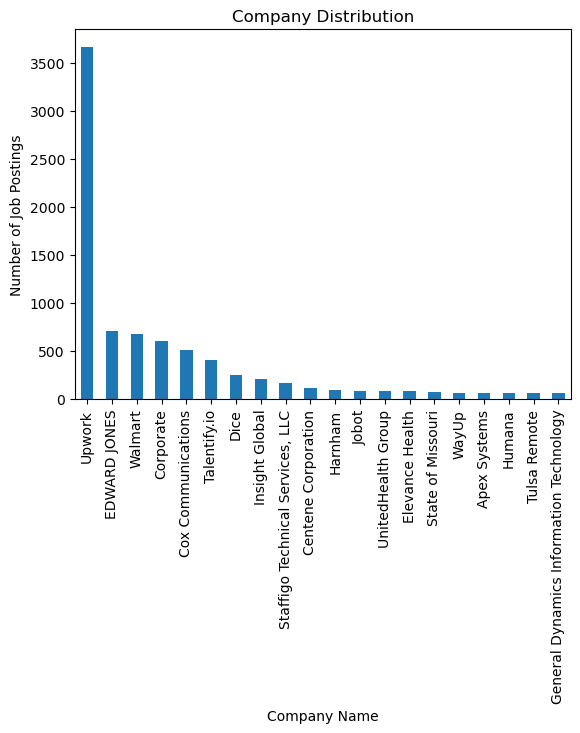

In [24]:
# Plot the distribution of the 'company_name' column
company_distribution = df['company_name'].value_counts()
company_distribution[:20].plot(kind='bar')  # We only take the top 20 for readability
plt.title('Company Distribution')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.show()

In [8]:
df.shape

(22853, 8)

## Data Type Conversion

# Feature Extraction

We will be going through the job descriptions and extracting features from the postings including Hard Skills, Soft skills, Education, and Experience.

In [9]:
# Step 1: Lowercasing
df['description'] = df['description'].str.lower()

In [10]:
# Step 2: Removing Punctuation
df['description'] = df['description'].str.replace(r'\W', ' ', regex=True)

In [11]:
# Step 3: Removing Stop Words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if not word in stop_words]
    return " ".join(filtered_text)

df['description'] = df['description'].apply(remove_stopwords)

In [12]:
# Step 4: Counting word frequencies
def count_words(text):
    word_tokens = word_tokenize(text)
    word_freq = Counter(word_tokens)
    return word_freq

# Apply the function to each description
df['word_counts'] = df['description'].apply(count_words)

In [13]:
# Initialize an empty counter
total_word_counts = Counter()

# Update it with each counter
for word_count in df['word_counts']:
    total_word_counts.update(word_count)

In [14]:
# Get a list of all words with their frequencies
word_frequencies = total_word_counts.items()

# Filter the list to include only the words that occur more than 100 times
common_words = [(word, count) for word, count in word_frequencies if count > 100]

# Sort the words by their frequency
common_words_sorted = sorted(common_words, key=lambda x: x[1], reverse=True)

# Print the sorted words
for word, count in common_words_sorted:
   print(word, count)

data 240659
experience 95247
business 83024
work 66214
analysis 46072
skills 41049
team 38231
analytics 37011
ability 33142
management 30401
support 29337
years 29323
analyst 27825
information 27419
including 26565
related 26098
tools 24643
reporting 24397
required 24175
knowledge 23889
requirements 23715
sql 22102
working 21731
job 21633
solutions 21373
degree 21332
health 21030
preferred 20835
role 20652
strong 20466
position 20406
using 20352
reports 19838
development 19599
company 19360
benefits 18363
quality 18296
insights 18258
time 18245
best 18238
technical 18195
provide 18080
develop 17714
new 17105
systems 16834
opportunity 16560
science 16490
identify 15964
analytical 15789
status 15681
qualifications 15555
based 15500
projects 15377
teams 15323
help 15253
process 15221
across 15094
processes 15025
us 14524
complex 14250
needs 13712
understanding 13631
employment 13589
project 13528
technology 13526
field 13511
financial 13447
key 13382
environment 13255
responsibilities 129

In [15]:
print(f"There are {len(common_words_sorted)} words with over 100 instances in the dataset.")

There are 4762 words with over 100 instances in the dataset.


In [16]:
# Get a list of all words with their frequencies
word_frequencies = total_word_counts.items()

# Filter the list to include only the words that occur more than 1000 times
common_words = [(word, count) for word, count in word_frequencies if count > 1000]

# Sort the words by their frequency
common_words_sorted = sorted(common_words, key=lambda x: x[1], reverse=True)

print(f"There are {len(common_words_sorted)} words with over 1000 instances in the dataset.")

There are 1289 words with over 1000 instances in the dataset.


In [17]:
# Get a list of all words with their frequencies
word_frequencies = total_word_counts.items()

# Filter the list to include only the words that occur more than 500 times
common_words = [(word, count) for word, count in word_frequencies if count > 500]

# Sort the words by their frequency
common_words_sorted = sorted(common_words, key=lambda x: x[1], reverse=True)

print(f"There are {len(common_words_sorted)} words with over 500 instances in the dataset.")

There are 2001 words with over 500 instances in the dataset.


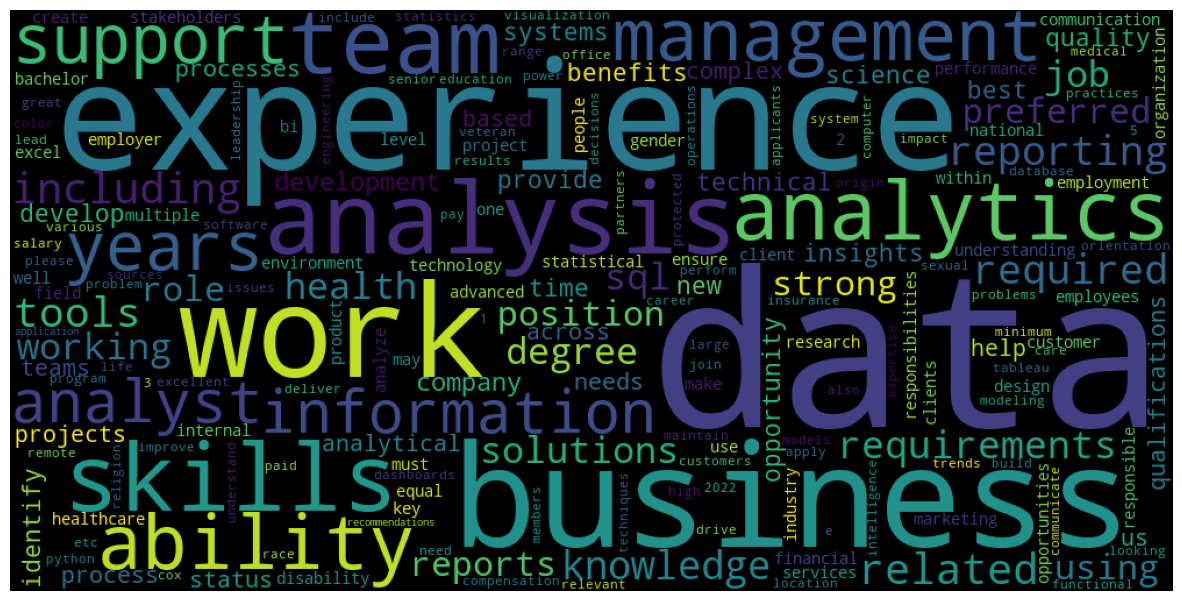

In [18]:
# Convert list of tuples into a dictionary
word_dict = dict(common_words_sorted)

# Generate word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_dict)

# Display the word cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

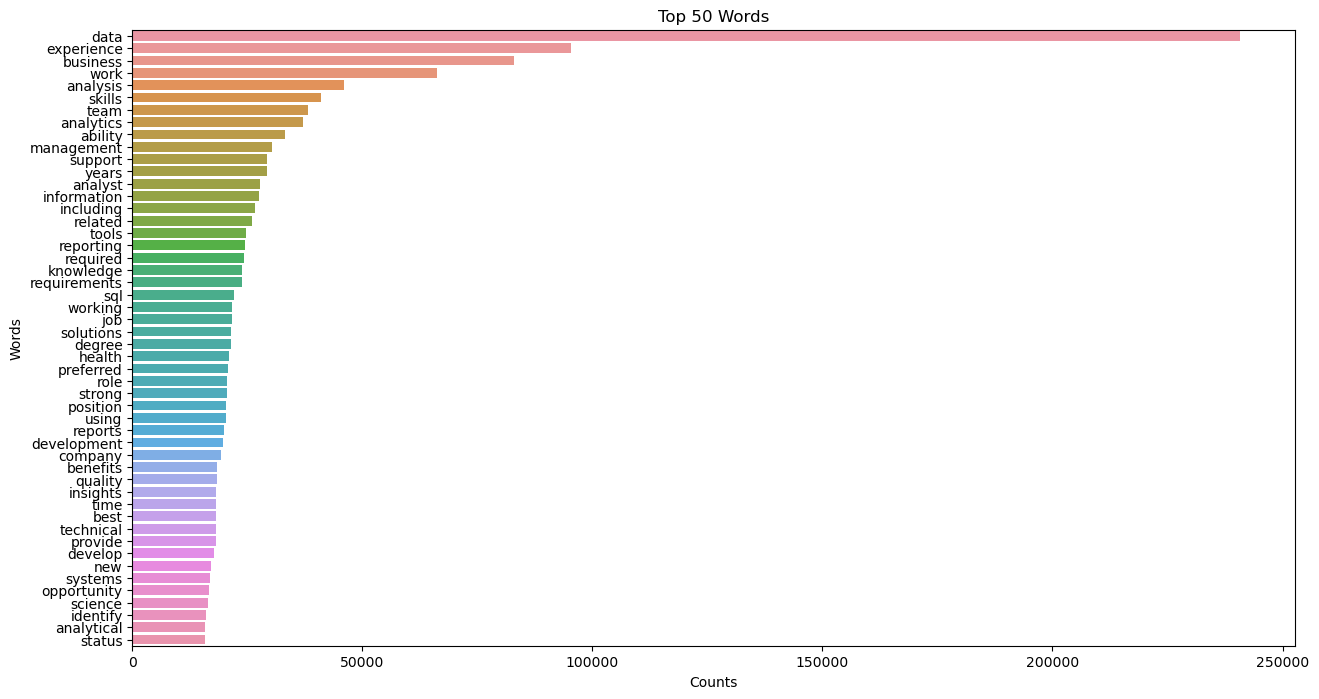

In [19]:
top_n = 50
words = [item[0] for item in common_words_sorted[:top_n]]
counts = [item[1] for item in common_words_sorted[:top_n]]

# Create a DataFrame
df_top_n = pd.DataFrame(list(zip(words, counts)), columns=['Words', 'Counts'])

# Plot
plt.figure(figsize=(15,8))
sns.barplot(x='Counts', y='Words', data=df_top_n)
plt.title(f"Top {top_n} Words")
plt.show()

## Extracting Hard Skills and Soft Skills

Current temp state: Going through the list of 4762 words with over 100 frequency in the dataset to identify if they are related to hard skills or soft skills.

Covered 2000 most frequent words so far:

In [20]:
# Defined hard skills
hard_skills = ["analysis", "analytics", "sql", "reporting", "tools", "development", 
               "technical", "science", "statistical", "excel", "visualization", 
               "python", "software", "engineering", "database", "modeling", 
               "techniques", "mathematics", "languages", "programming", 
               "cloud", "etl", "automation", "oracle", "machine", "processing", "document",
               "warehouse", "administration", "efficiency", "proficient",
               "powerbi", "language", "coding", "software development",
               "salesforce", "architecture", "server", "maintenance",
               "validation", "predictive", "aws", "azure", "snowflake",
               "powerpoint", "word", "web", "mapping", "scripting", "sap",
               "structured", "ai", "intermediate", "descriptive", "storage",
               "pipelines", "pivot", "analysis", "analytics", "conducting", "measurement", 
               "operating", "auditing", "workflow", "automation", "algorithm", 
               "logic", "troubleshooting", "scripting", "regression", 
               "data_cleaning", "data_profiling", "data_visualization", 
               "project_management", "querying", "machine_learning", 
               "statistical_analysis", "data_management",
               "optimal", "link", "configuration", "sourcing", "percent", "input", "ml", "collecting",
               "electronic", "coordination", "adobe", "extraction", "hadoop", "efficiently", 
               "qa", "secure", "implementations", "java", "sharepoint", "speed", "classification",
               "visa", "met", "kpi", "microstrategy", "criteria", "stack", "warehouses", "javascript",
               "visualize", "accessibility", "logical", "modelling", "scrum", "xml", "definition",
               "protocols", "outlook", "qlik", "calculations", "ssrs", "slas", "ssis", "lineage",
               "nosql", "roadmap", "extracting", "setup", "forecast", "epic", "reliability",
               "spreadsheets", "defects", "cybersecurity", "ga4", "gdit", "computing", "hive",
               "reconcile", "consultants", "architects", "construction", "dod", "variables", 
               "integrations", "validating", "edi", "Genetics", "Medicine", "Phd", "Pandas",
               "standardization"]

In [21]:
# Defined soft skills
soft_skills = ["team", "management", "support", "communication", "leadership",
               "problem-solving", "collaboration", "teamwork", "initiative", "adaptability",
               "interpersonal skills", "networking", "passion", "responsibility", 
               "ability to work under pressure","conflict resolution", "creativity",
               "time management","multitasking", "critical thinking", "decision making",
               "empathy", "negotiation", "motivation", "teamwork", "management", 
               "communication", "initiative", "presentation", "collaboration", 
               "leadership", "decision_making", "problem_solving", 
               "interpersonal_skills", "organizational_skills", "time_management", 
               "adaptability", "critical_thinking", "creativity", 
               "attention_to_detail", "resilience", "flexibility", 
               "emotional_intelligence", "self-motivation",
               "understands", "accurately", "challenging", "determined", "efficiently", "accountable",
               "simultaneously", "familiar", "accountability", "attention_to_detail", "resilience", 
               "flexibility", "emotional_intelligence", "self-motivation", "reliable", "undergraduate", 
               "teamwork", "urgency", "attitude", "fair", "easily", "accessible", "awareness", 
               "confidence", "reconciliation", "responsible", "motivated", "ethic", "creativity", 
               "advancement", "peer", "supervisory", "aptitude", "consult", "satisfaction", 
               "acquire", "mentorship", "examples", "objective", "supportive", "keen", "engaging",
               "resourceful", "organized", "ethical"]

In [22]:
hard_skills = list(set(hard_skills))
soft_skills = list(set(soft_skills))

## Extracting Education Requirements

## Extracting Experience Requirements

## Categorizing 'via' column

## Handling 'schedule_type' Column

# One-Hot Encoding

## Encoding Hard Skills and Soft Skills

### Hard Skills

### Soft Skills

## Encoding Education and Experience Requirements